In [76]:
from mlwpy import *
%matplotlib inline

### 2.4 Probability

In [11]:
np.random.randint(1, 7)

3

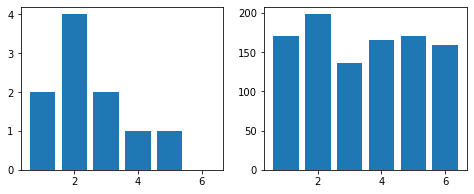

In [19]:
few_rolls = np.random.randint(1, 7, size=10)
many_rolls = np.random.randint(1, 7, size=1000)

few_counts = np.histogram(few_rolls, bins=np.arange(.5, 7.5))[0]
many_counts = np.histogram(many_rolls, bins=np.arange(.5, 7.5))[0]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,3))
ax1.bar(np.arange(1,7), few_counts)
ax2.bar(np.arange(1,7), many_counts);

### 2.4.4 Distributions

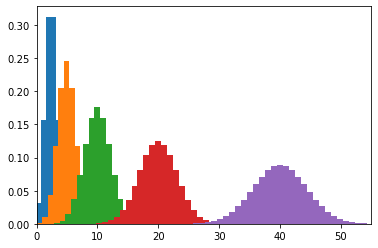

In [22]:
import scipy.stats as ss

b = ss.distributions.binom
for flips in [5, 10, 20, 40, 80]:
    #binomial with .5 is result of many coin flips
    success = np.arange(flips)
    our_distribution = b.pmf(success, flips, .5)
    plt.hist(success, flips, weights=our_distribution)
    
plt.xlim(0,55);

In [27]:
type(b)

scipy.stats._discrete_distns.binom_gen

(0.0, 55.0)

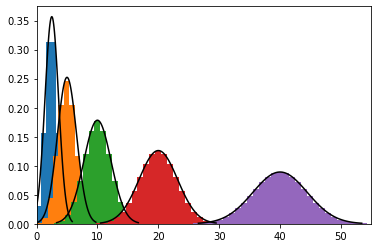

In [24]:
b = ss.distributions.binom
n = ss.distributions.norm

for flips in [5, 10, 20, 40, 80]:
    #binomial coin flips
    success = np.arange(flips)
    our_distribution = b.pmf(success, flips, .5)
    plt.hist(success, flips, weights=our_distribution)
    
    #normal approximation to that binomial
    #we have to set the mean and standard deviation
    
    mu = flips * .5,
    std_dev = np.sqrt(flips * .5 * (1-.5))
    
    #we have to set up both the x and y points for the normal
    #we get the ys from the distribution (a function)
    #we have to feed it xs, we set those up here
    
    norm_x = np.linspace(mu-3*std_dev, mu+3*std_dev, 100)
    norm_y = n.pdf(norm_x, mu, std_dev)
    plt.plot(norm_x, norm_y, 'k');
    
plt.xlim(0,55)

### 2.5.1 Weighted Average

In [29]:
values = np.array([10.0,20.0,30.0])
weights = np.full_like(values, 1/3) #repeated 1/3

print("weights:", weights)
print("via mean:", np.mean(values))
print("via weights and dot:", np.dot(weights,values))

weights: [0.3333 0.3333 0.3333]
via mean: 20.0
via weights and dot: 20.0


In [30]:
values = np.array([10,20,30])
weights = np.array([.5,.25,.25])

np.dot(weights,values)

17.5

In [32]:
payoffs = np.array([1.0,-0.5])
probs = np.array([.5,.5])

np.dot(payoffs, probs) * 10000

2500.0

In [33]:
def is_even(n):
    #if remainder is 0, it is even
    return n % 2 == 0

winnings = 0.0
for toss_ct in range(10000):
    die_toss = np.random.randint(1,7)
    winnings += 1.0 if is_even(die_toss) else -0.5
print(winnings)

2543.5


In [35]:
(-5) ** 2

25

In [36]:
5 ** 2

25

### 2.6 Lines

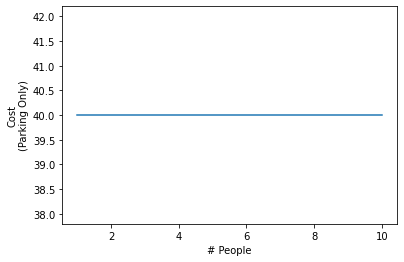

In [40]:
people = np.arange(1,11)
total_cost = np.ones_like(people) * 40.0

ax = plt.gca()

ax.plot(people, total_cost)
ax.set_xlabel("# People")
ax.set_ylabel("Cost\n(Parking Only)");

In [41]:
total_cost = 80.0 * people + 40.0

display(pd.DataFrame({'total_cost': total_cost.astype(np.int)},
                    index=people).T)

,1,2,3,4,5,6,7,8,9,10
total_cost,120,200,280,360,440,520,600,680,760,840


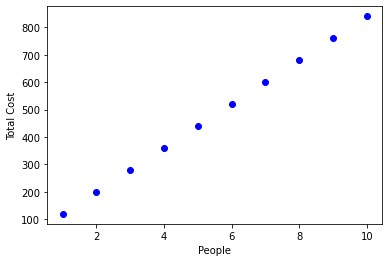

In [42]:
ax = plt.gca()
ax.plot(people, total_cost, 'bo')
ax.set_ylabel("Total Cost")
ax.set_xlabel("People");

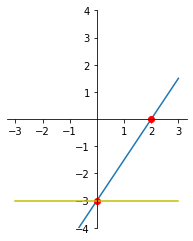

In [82]:
#paint by number
#create 100 x vales from -3 to 3

xs = np.linspace(-3, 3, 100)

#slope m and intercept b
m, b = 1.5, -3

ax = plt.gca()

ys = m*xs + b

ax.plot(xs, ys)

ax.set_ylim(-4, 4)
high_school_style(ax) #helper from py file

ax.plot(0, -3, 'ro') #y-intercept
ax.plot(2, 0, 'ro') #two steps right gives three steps up

# y = mx + b with m=0 gives y=b
ys = 0*xs + b
ax.plot(xs, ys, 'y');

plt.show()

In [83]:
#np.c[] lets us create an array column-by-column

xs = np.linspace(-3, 3, 100)
xs_p1 = np.c_[xs, np.ones_like(xs)]

#view the first few rows
display(pd.DataFrame(xs_p1).head())

,0,1
0,-3.0000,1.0000
1,-2.9394,1.0000
2,-2.8788,1.0000
3,-2.8182,1.0000
4,-2.7576,1.0000


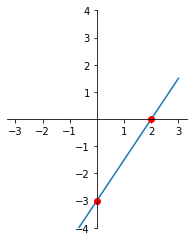

In [86]:
w = np.array([1.5, -3])
ys = np.dot(xs_p1, w)

ax = plt.gca()
ax.plot(xs, ys)

#styling

ax.set_ylim(-4, 4)
high_school_style(ax)

ax.plot(0, -3, 'ro') #y-intercept
ax.plot(2, 0, 'ro'); #two steps to the right should be three whole steps up

In [87]:
w

array([ 1.5, -3. ])

In [92]:
print(np.ones_like([2, 3, 5]))

[1 1 1]


(0.0, 1.0, 0.0, 1.0)

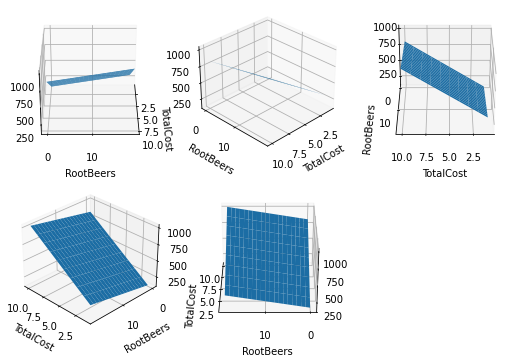

In [95]:
number_people = np.arange(1, 11) #1-10 people
number_rbs = np.arange(0, 20) #0-19 rootbeers

#numpy tool to get cross-product of values (each against each)
#in two paired arrays. try it out: np.meshgrid([0,1], [10,20])
#"perfect" for functions of multiple variables

number_people, number_rbs = np.meshgrid(number_people, number_rbs)

total_cost = 80 * number_people + 10 * number_rbs + 40

#import needed for 'projection':'3d'
from mpl_toolkits.mplot3d import Axes3D
fig,axes = plt.subplots(2, 3,
                       subplot_kw={'projection':'3d'},
                       figsize=(9,6))

angles = [0, 45, 90, 135, 180]
for ax, angle in zip(axes.flat, angles):
    ax.plot_surface(number_people, number_rbs, total_cost)
    ax.set_xlabel("People")
    ax.set_ylabel("RootBeers")
    ax.set_xlabel("TotalCost")
    ax.azim = angle
    
#we don't use the last axis
axes.flat[-1].axis('off')
#fig.tight_layout()

In [97]:
number_people = np.array([2,3])
number_rbs = np.array([0,1,2])
number_hotdogs = np.array([2,4])

costs = np.array([80, 10, 5])

columns = ["People", "RootBeer", "HotDogs", "TotalCost"]

counts = np_cartesian_product(number_people,
                             number_rbs,
                             number_hotdogs)

totals = (costs[0] * counts[:,0] +
         costs[1] * counts[:,1] +
         costs[2] * counts[:,2] + 40)

display(pd.DataFrame(np.c_[counts,totals],
                    columns=columns).head(8))

,People,RootBeer,HotDogs,TotalCost
0,2,0,2,210
1,2,0,4,220
2,3,0,2,290
3,3,0,4,300
4,2,1,2,220
5,2,1,4,230
6,3,1,2,300
7,3,1,4,310


In [98]:
costs = np.array([80, 10, 5])
counts = np_cartesian_product(number_people,
                             number_rbs,
                             number_hotdogs)

totals = np.dot(counts, costs) + 40
display(pd.DataFrame(np.column_stack([counts,totals]),
                    columns=columns).head(8))

,People,RootBeer,HotDogs,TotalCost
0,2,0,2,210
1,2,0,4,220
2,3,0,2,290
3,3,0,4,300
4,2,1,2,220
5,2,1,4,230
6,3,1,2,300
7,3,1,4,310


### 2.8 Nonlinearity

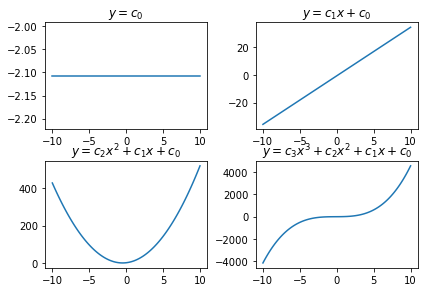

In [105]:
fig, axes = plt.subplots(2,2)
fig.tight_layout()

titles = ["$y=c_0$",
         "$y=c_1x+c_0$",
         "$y=c_2x^2+c_1x+c_0$",
         "$y=c_3x^3+c_2x^2+c_1x+c_0$"]

xs = np.linspace(-10, 10, 100)
for power, (ax, title) in enumerate(zip(axes.flat, titles), 1):
    coeffs = np.random.uniform(-5, 5, power)
    poly = np.poly1d(coeffs)
    ax.plot(xs, poly(xs))
    ax.set_title(title)


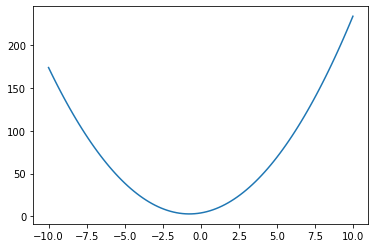

In [107]:
plt.Figure((2, 1.5))

xs = np.linspace(-10, 10, 101)
coeffs = np.array([2, 3, 4])
ys = np.dot(coeffs, [xs**2, xs**1, xs**0])

#nice parabola via a dot product
plt.plot(xs, ys);

In [109]:
oned_vec = np.arange(5)
print(oned_vec, "-->", oned_vec * oned_vec)
print("self.dot:", np.dot(oned_vec, oned_vec))


[0 1 2 3 4] --> [ 0  1  4  9 16]
self.dot: 30


In [110]:
row_vec = np.arange(5).reshape(1, 5)
col_vec = np.arange(0, 50, 10).reshape(5, 1)

In [117]:
oned_vec

array([0, 1, 2, 3, 4])

In [118]:
row_vec

array([[0, 1, 2, 3, 4]])

In [112]:
col_vec

array([[ 0],
       [10],
       [20],
       [30],
       [40]])

In [113]:
print(oned_vec.shape, 
     col_vec.shape, sep="\n")

(5,)
(5, 1)


In [114]:
row_vec.T

array([[0],
       [1],
       [2],
       [3],
       [4]])

In [115]:
col_vec.T

array([[ 0, 10, 20, 30, 40]])

In [116]:
print(np.dot(row_vec, oned_vec))
try: print(np.dot(oned_vec, row_vec))
except: print("boom")

[30]
boom


In [119]:
print(np.allclose(np.dot(oned_vec.reshape(1,5), col_vec),
                 np.dot(oned_vec, col_vec)),
     np.allclose(np.dot(row_vec, oned_vec.reshape(5, 1)),
                np.dot(row_vec, oned_vec)))

True True


In [121]:
D = np.array([[1,3],
             [2,5],
             [2,7],
             [3,2]])

weights = np.array([1.5, 2.5])

np.dot(D, w)

array([ -7.5, -12. , -18. ,  -1.5])

In [124]:
try:
    np.dot(w,D)
except ValueError:
        print("BOOM. :sadface:")

BOOM. :sadface:


In [125]:
def rdot(arr,brr):
    'reversed-argument version of np.dot'
    return np.dot(brr,arr)

rdot(w,D)

array([ -7.5, -12. , -18. ,  -1.5])

In [128]:
1.1 + 2.2 == 3.3

False

In [127]:
np.allclose(1.1 + 2.2,3.3)

True